# Creating the dataset by merging many existing open source datasets

### Converting RGBA images to RGB images
- Some of the data was in rgba format hence a script conversion.py was included to convert all of them
- currently not necessary as all conversions have already been done

In [1]:
import importlib
import conversion
importlib.reload(conversion)
from conversion import process_images

# Set input and output directories
input_dir = "data"
output_dir = "aksharam_data"

# Process images
process_images(input_dir, output_dir)

### Saving all images for .csv file from amritha_malChar_db as .png

First we have to swap the 0 and 1 values from within the csv file to match our datasets

In [2]:
# first swap the values of 0 and 1 within the file
# first for the training data
import csv
def swap_0_and_1(input_file, output_file):
    with open(input_file, mode='r') as infile, open(output_file, mode='w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row in reader:
            # Keep the first column as is
            new_row = [row[0]]
            
            # Swap 0 and 1 in the remaining columns
            for value in row[1:]:
                if value == '0':
                    new_row.append('1')
                elif value == '1':
                    new_row.append('0')
                else:
                    new_row.append(value)
            
            # Write the modified row to the output file
            writer.writerow(new_row)

# for train data
swap_0_and_1('handwritten_data\Handwritten_V2_train.csv', 'train_values.csv')
print(f"Modified CSV saved to {'train_values.csv'}")

# for test data
swap_0_and_1('handwritten_data\Handwritten_V2_test.csv', 'train_values.csv')
print(f"Modified CSV saved to {'test_values.csv'}")

# for validation data
swap_0_and_1('handwritten_data\Handwritten_V2_valid.csv', 'train_values.csv')
print(f"Modified CSV saved to {'valid_values.csv'}")

Modified CSV saved to train_values.csv
Modified CSV saved to test_values.csv
Modified CSV saved to valid_values.csv


#### Displaying these images

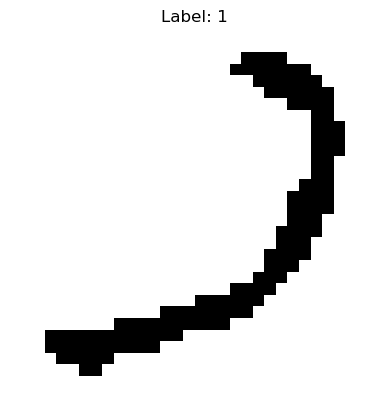

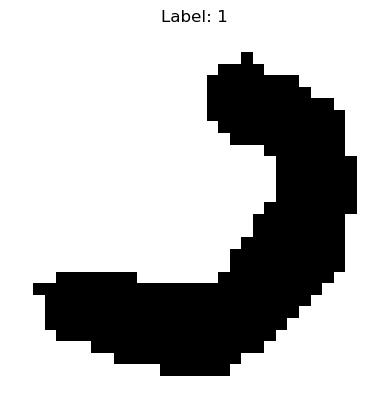

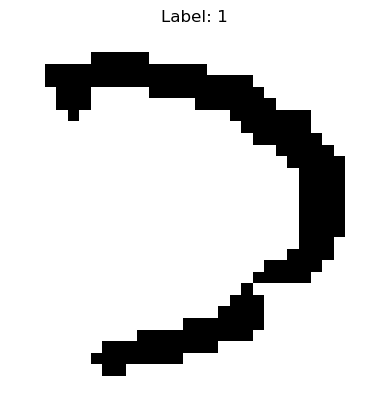

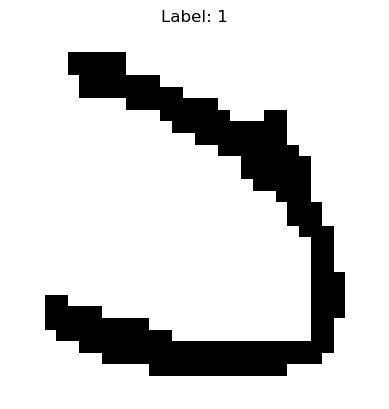

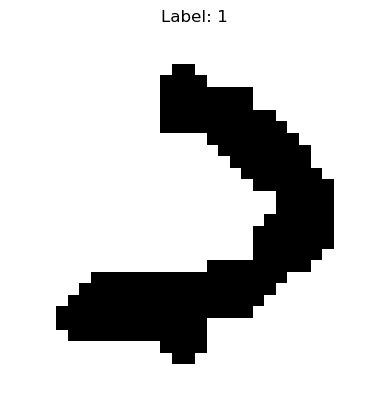

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file
file_path = 'train_values.csv'
data = np.loadtxt(file_path, delimiter=',')

# Assuming each row represents an image, and the first column is the label
labels = data[:, 0]
images = data[:, 1:]

# Assuming the images are 28x28 pixels (since 784 = 28*28)
image_size = 32

# Function to display an image
def display_image(pixels, label):
    # Reshape the 1D array into a 2D array representing the image
    image = pixels.reshape((image_size, image_size))
    
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {int(label)}')
    plt.axis('off')
    plt.show()

# Display each image
for i in range(5):
    display_image(images[i], labels[i])

All images are in 32x32px format while images from other datasets are in 300x300px format

#### Now saving these pixel values as images in output folder

In [4]:
import pandas as pd
import numpy as np
from PIL import Image
import os

def normalize_pixels(pixels):
    if np.max(pixels) <= 255 and np.min(pixels) >= 0 and pixels.dtype == np.uint8:
        return pixels
    pixels_norm = (pixels - np.min(pixels)) / (np.max(pixels) - np.min(pixels))
    return (pixels_norm * 255).astype(np.uint8)

def csv_to_images(csv_path, image_size=(28, 28), output_dir='output_images'):
    print("Reading CSV file...")
    df = pd.read_csv(csv_path)
    label_column = df.columns[0]
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    print("Processing images...")
    for index, row in df.iterrows():
        label = str(row[label_column])
        pixels = row.iloc[1:].values
        
        label_dir = os.path.join(output_dir, label)
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        
        pixels = normalize_pixels(pixels)
        
        try:
            image_array = pixels.reshape(image_size)
        except ValueError:
            print(f"Error reshaping row {index}")
            continue
        
        # Convert grayscale to RGB by stacking the same values in three channels
        image = Image.fromarray(np.stack([image_array] * 3, axis=-1), mode='RGB')
        image = image.rotate(-90, expand=True)
        
        # Mirror (flip horizontally)
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
        
        image_path = os.path.join(label_dir, f'image_{index}.png')
        image.save(image_path, format='PNG', compress_level=0)  # Lossless PNG
        
        if (index + 1) % 100 == 0:
            print(f"Processed {index + 1} images")
    
    print("Conversion complete!")

if __name__ == "__main__":
    image_size = (32, 32)
    csv_to_images("train_values.csv", image_size=image_size)
    csv_to_images("test_values.csv", image_size=image_size)
    csv_to_images("valid_values.csv", image_size=image_size)


Reading CSV file...
Processing images...
Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processed 1000 images
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images
Processed 1500 images
Processed 1600 images
Processed 1700 images
Processed 1800 images
Processed 1900 images
Processed 2000 images
Processed 2100 images
Processed 2200 images
Processed 2300 images
Processed 2400 images
Processed 2500 images
Processed 2600 images
Processed 2700 images
Processed 2800 images
Processed 2900 images
Processed 3000 images
Processed 3100 images
Processed 3200 images
Processed 3300 images
Processed 3400 images
Processed 3500 images
Processed 3600 images
Processed 3700 images
Processed 3800 images
Processed 3900 images
Processed 4000 images
Processed 4100 images
Processed 4200 images
Processed 4300 images
Processed 4400 images


#### **Now I manually go through each folder and sort out the data accordingly**